In [1]:
import numpy as np
import matplotlib.pyplot as plt

3.1.2: Classification with a single-layer perceptron and analysis

In [2]:
# function for generating data

def generate_data(n, mA, sigmaA, mB, sigmaB):

  classA = np.zeros((n, 2))
  classB = np.zeros((n, 2))

  classA[:, 0] = np.random.randn(n) * sigmaA + mA[0]
  classA[:, 1] = np.random.randn(n) * sigmaA + mA[1]

  classB[:, 0] = np.random.randn(n) * sigmaB + mB[0]
  classB[:, 1] = np.random.randn(n) * sigmaB + mB[1]

  return classA, classB

 # generating data
data = generate_data(100, np.array([2, 2]), 0.75, np.array([-3, -3]), 0.75)
classA = data[0]
classB = data[1]


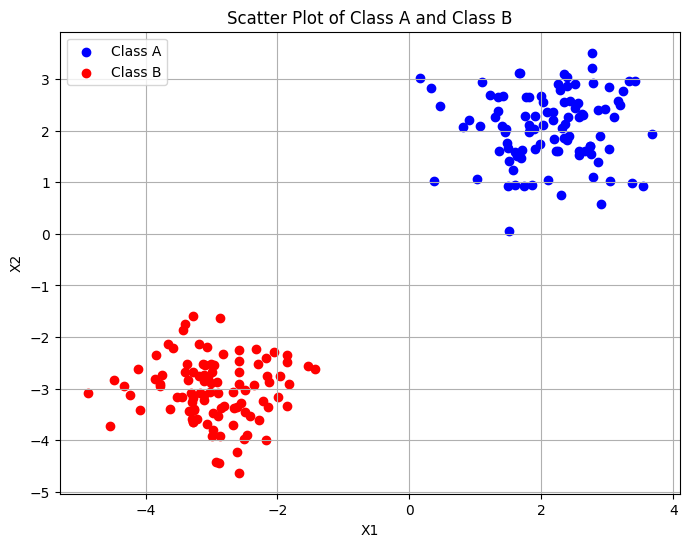

In [3]:
# plotting data
plt.figure(figsize=(8, 6))
plt.scatter(classA[:, 0], classA[:, 1], color='blue', label='Class A')
plt.scatter(classB[:, 0], classB[:, 1], color='red', label='Class B')

plt.title('Scatter Plot of Class A and Class B')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# function for pre-processing data

def preprocess_data(classA, classB, bias=True):

  len_classA = classA.shape[0]
  len_classB = classB.shape[0]

  # create target values
  targetA = -1 * np.ones((len_classA,1))  # label as -1
  targetB = np.ones((len_classB,1))       # label as 1

  if bias == True:
    # add bias to the data
    biasA = np.ones((len_classA,1))
    biasB = np.ones((len_classB,1))
    patternA = np.hstack((classA, biasA, targetA))
    patternB = np.hstack((classB, biasB, targetB))

  else:
    patternA = np.hstack((classA, targetA))
    patternB = np.hstack((classB, targetB))

  # shuffle the two classes and their respective targets
  pattern = np.vstack((patternA, patternB))
  shuffled_indices = np.random.permutation(pattern.shape[0])
  pattern = pattern[shuffled_indices, :]
  target = pattern[:,-1]
  pattern = np.delete(pattern, -1, axis=1)

  return pattern, target


# pre-process data
pattern, target = preprocess_data(classA, classB, True)

# create initial random weights
init_weights = np.random.rand(pattern.shape[1]).T

In [5]:
# define testing function

def calculate_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    accuracy = correct_predictions / true_labels.shape[0]
    return accuracy

3.1.2.1: Comparison of perceptron learning with the delta learning rule in sequential mode

In [6]:
# define sequential learning functions

def delta_learning_sequential(inputs, target, initial_weights, lr=0.001, epochs=20):

    weights = initial_weights.copy()

    # split data into training and test data
    tr_to_te_ratio = 0.9
    split_index = int(pattern.shape[0] * tr_to_te_ratio)
    inputs_test = inputs[split_index:,:]
    target_test = target[split_index:]
    inputs_train = inputs[:split_index,:]
    target_train = target[:split_index]

    accuracy_values = np.zeros(epochs)
    mse_values = np.zeros(epochs)

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(inputs_train.shape[0])
        inputs_train = inputs_train[shuffled_indices, :]
        target_train = target_train[shuffled_indices]

        squared_errors = []

        for i in range(inputs_train.shape[0]):
            prediction = np.dot(inputs_train[i], weights)
            error = target_train[i] - prediction
            weights += lr * error * inputs_train[i]
            squared_errors.append(error ** 2)


        predictions = np.sign(np.dot(inputs_test, weights))
        accuracy = calculate_accuracy(predictions, target_test)
        accuracy_values[epoch] = accuracy

        mse_values[epoch] = np.mean(squared_errors)

    return weights, accuracy_values, mse_values


def perceptron_learning_sequential(inputs, target, initial_weights, lr=0.001, epochs=20):

    weights = initial_weights.copy()

    # split data into training and test data
    tr_to_te_ratio = 0.9
    split_index = int(pattern.shape[0] * tr_to_te_ratio)
    inputs_test = inputs[split_index:,:]
    target_test = target[split_index:]
    inputs_train = inputs[:split_index,:]
    target_train = target[:split_index]

    accuracy_values = np.zeros(epochs)
    mse_values = np.zeros(epochs)

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(inputs_train.shape[0])
        inputs_train = inputs_train[shuffled_indices, :]
        target_train = target_train[shuffled_indices]

        squared_errors = []

        for i in range(inputs_train.shape[0]):
            prediction = np.sign(np.dot(inputs_train[i], weights))
            error = target_train[i] - prediction
            weights += lr * error * inputs_train[i]
            squared_errors.append(error ** 2)


        predictions = np.sign(np.dot(inputs_test, weights))
        accuracy = calculate_accuracy(predictions, target_test)
        accuracy_values[epoch] = accuracy
        mse_values[epoch] = np.mean(squared_errors)

    return weights, accuracy_values, mse_values

In [7]:
# train models

learning_rates = [0.01,0.001,0.0001,0.00001]
epochs = 20
delta_seq_results = []
perceptron_seq_results = []

for learning_rate in learning_rates:
    delta_seq_results.append((delta_learning_sequential(pattern, target, init_weights,lr = learning_rate, epochs=epochs)))
    perceptron_seq_results.append((perceptron_learning_sequential(pattern, target, init_weights,lr = learning_rate, epochs=epochs)))

delta_seq_results = np.array(delta_seq_results, dtype=[('weights', object), ('accuracies', object), ('mses', object)])
perceptron_seq_results = np.array(perceptron_seq_results, dtype=[('weights', object), ('accuracies', object), ('mses', object)])

delta_seq_weights = delta_seq_results['weights']
delta_seq_accuracies = delta_seq_results['accuracies']
delta_seq_mses = delta_seq_results['mses']

perceptron_weights = perceptron_seq_results['weights']
perceptron_accuracies = perceptron_seq_results['accuracies']
perceptron_mses = perceptron_seq_results['mses']

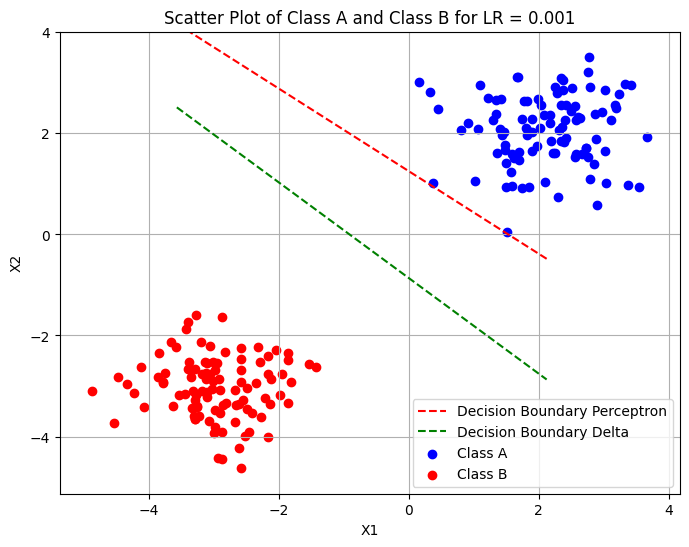

In [8]:
# Function to calculate the decision boundary based on weights
def decision_boundary(x1, weights):
    if len(weights) == 3:
      w1, w2, bias = weights
      return - (w1 * x1 + bias) / w2
    if len(weights) == 2:
      w1, w2 = weights
      return - (w1 * x1) / w2

# Generate x values for the plot based on the range of the data
x1_min = min(np.min(classA[0, :]), np.min(classB[0, :])) - 0.5
x1_max = max(np.max(classA[0, :]), np.max(classB[0, :])) + 0.5
x1_values = np.linspace(x1_min, x1_max, 100)

# Calculate corresponding x2 values for the decision boundary
x2_values_p = decision_boundary(x1_values, perceptron_weights[-3]) # Perceptron
x2_values_d = decision_boundary(x1_values, delta_seq_weights[-3]) # Delta

# Plotting
plt.figure(figsize=(8, 6))

# Plot decision boundary
plt.plot(x1_values, x2_values_p, 'r--', label='Decision Boundary Perceptron')
plt.plot(x1_values, x2_values_d, 'g--', label='Decision Boundary Delta')

# Scatter plot of the classes
plt.scatter(classA[:, 0], classA[:, 1], color='blue', label='Class A')
plt.scatter(classB[:, 0], classB[:, 1], color='red', label='Class B')

# Set plot limits based on the data range with a little padding
xlim_min = min(np.min(classA[:, 0]), np.min(classB[:, 0])) - 0.5
xlim_max = max(np.max(classA[:, 0]), np.max(classB[:, 0])) + 0.5
ylim_min = min(np.min(classA[:, 1]), np.min(classB[:, 1])) - 0.5
ylim_max = max(np.max(classA[:, 1]), np.max(classB[:, 1])) + 0.5

plt.xlim(xlim_min, xlim_max)
plt.ylim(ylim_min, ylim_max)

# Additional plot settings
plt.title('Scatter Plot of Class A and Class B for LR = 0.001')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

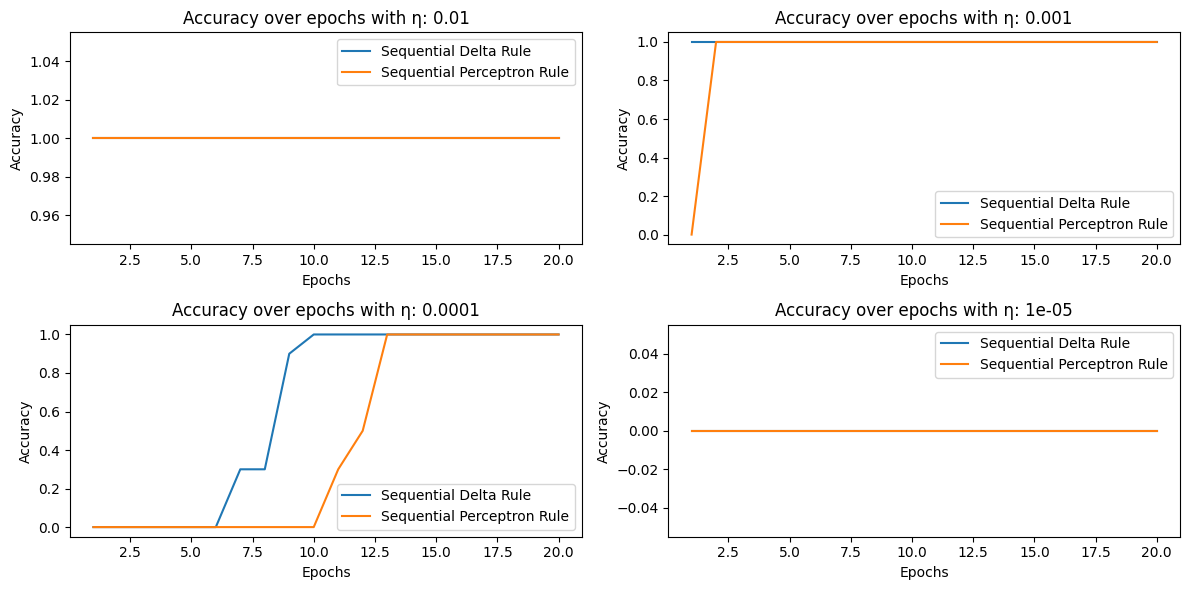

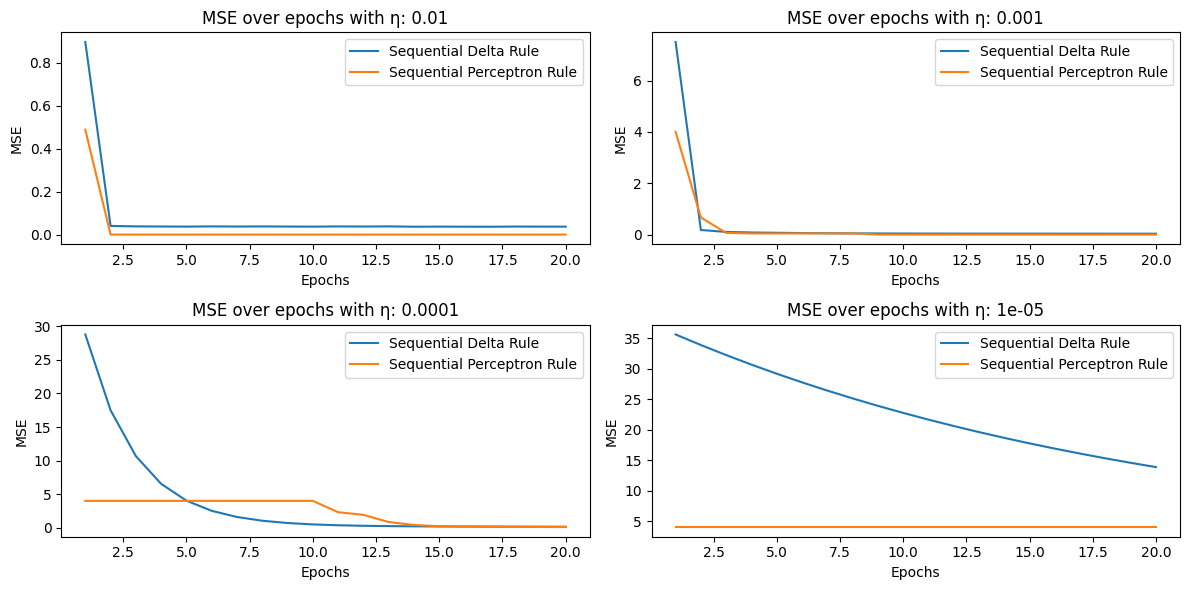

In [9]:
# function for plotting

def plot_results(results, model_labels, hyperparameter_values, metric, hyperparameter):
    num_models = len(results)
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    for i, val in enumerate(hyperparameter_values):
        row = i // 2
        col = i % 2

        for idx in range(num_models):
            model_result = results[idx]
            axes[row, col].plot(range(1, len(model_result[i]) + 1), model_result[i], label=model_labels[idx])
            axes[row, col].set_xlabel('Epochs')
            axes[row, col].set_ylabel(metric)
            axes[row, col].set_title(f'{metric} over epochs with {hyperparameter}: {val}')
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()

#plotting

labels = ['Sequential Delta Rule','Sequential Perceptron Rule']
accuracies = [delta_seq_accuracies, perceptron_accuracies]
mses = [delta_seq_mses, perceptron_mses]

plot_results(accuracies,labels,learning_rates,"Accuracy",'η')
plot_results(mses,labels,learning_rates,"MSE",'η')

3.2.1.2: Comparison of sequential and batch learning approach for the delta rule

In [10]:
# define batch learning

def delta_learning_batch(inputs, target, initial_weights, lr=0.001, epochs=20):

    weights = initial_weights.copy()

    # split data into training and test data
    tr_to_te_ratio = 0.9
    split_index = int(pattern.shape[0] * tr_to_te_ratio)
    inputs_test = inputs[split_index:,:]
    target_test = target[split_index:]
    inputs_train = inputs[:split_index,:]
    target_train = target[:split_index]

    accuracy_values = np.zeros(epochs)
    mse_values = np.zeros(epochs)

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(inputs_train.shape[0])
        inputs_train = inputs_train[shuffled_indices, :]
        target_train = target_train[shuffled_indices]

        prediction = np.dot(weights, inputs_train.T)
        error = target_train - prediction
        weights += lr * np.dot(error, inputs_train)

        predictions = np.sign(np.dot(weights, inputs_test.T))
        accuracy = calculate_accuracy(predictions, target_test)
        accuracy_values[epoch] = accuracy
        mse_values[epoch] = np.mean(error ** 2)

    return weights, accuracy_values, mse_values

In [11]:
delta_batch_results = []
for learning_rate in learning_rates:
    delta_batch_results.append((delta_learning_batch(pattern, target, init_weights,lr = learning_rate, epochs=epochs)))

delta_batch_results = np.array(delta_batch_results, dtype=[('weights', object),('accuracies', object),('mses', object)])

delta_batch_weights = delta_batch_results['weights']
delta_batch_accuracies = delta_batch_results['accuracies']
delta_batch_mses = delta_batch_results['mses']

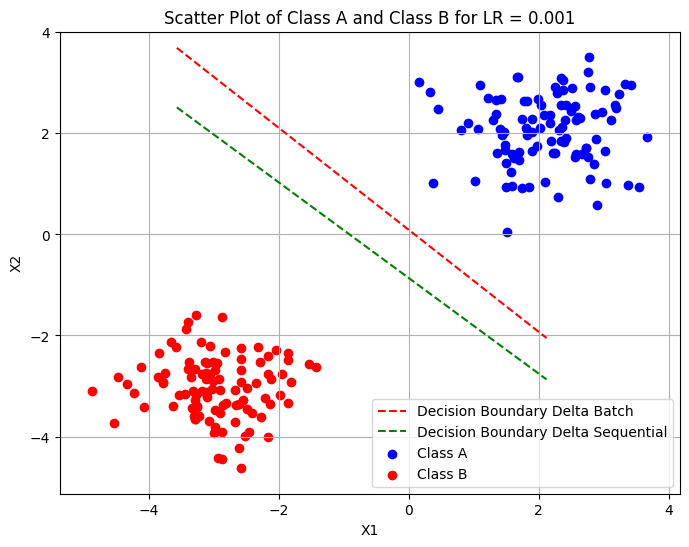

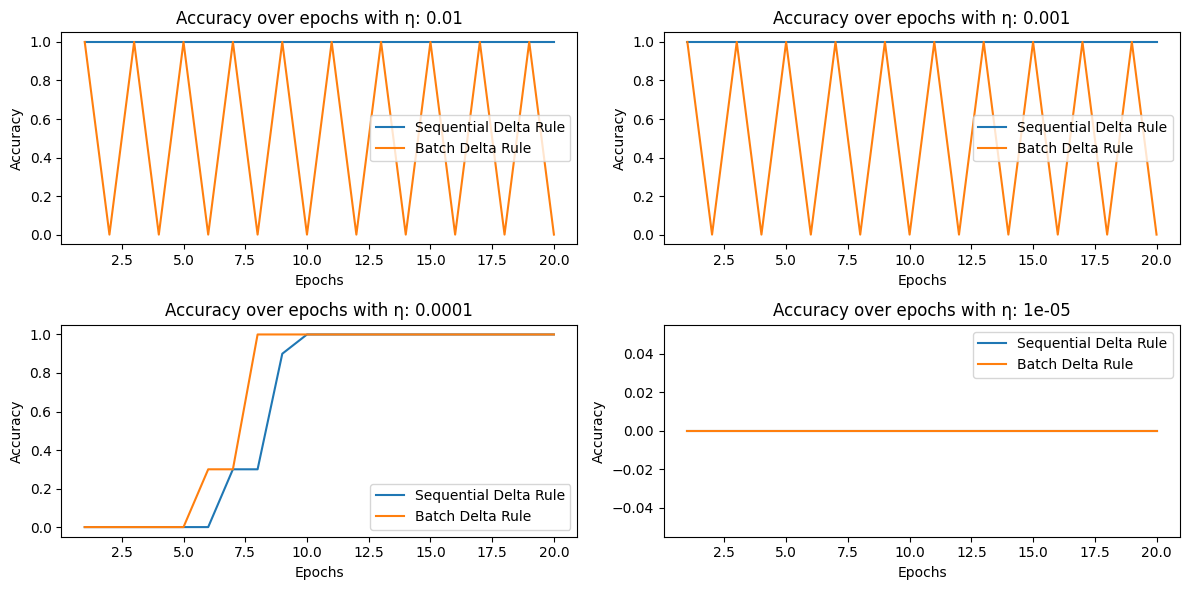

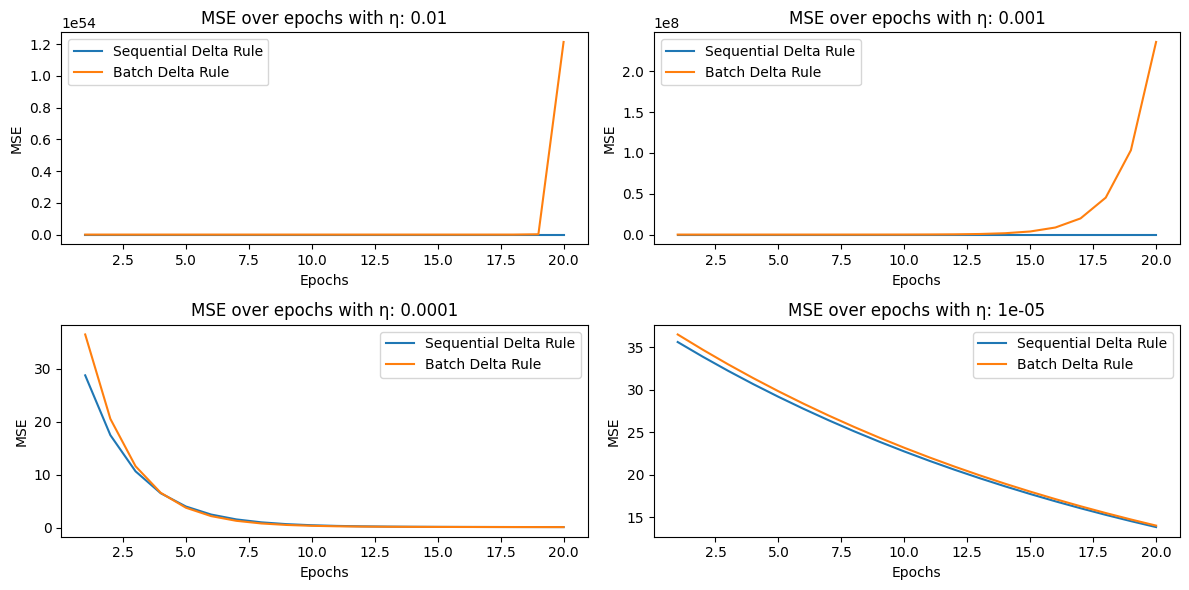

In [12]:
#plotting

# Generate x values for the plot based on the range of the data
x1_min = min(np.min(classA[0, :]), np.min(classB[0, :])) - 0.5
x1_max = max(np.max(classA[0, :]), np.max(classB[0, :])) + 0.5
x1_values = np.linspace(x1_min, x1_max, 100)

# Calculate corresponding x2 values for the decision boundary
x2_values_b = decision_boundary(x1_values, delta_batch_weights[-3]) # Deltas batch
x2_values_seq = decision_boundary(x1_values, delta_seq_weights[-3]) # Delta seq

# Plotting
plt.figure(figsize=(8, 6))

# Plot decision boundary
plt.plot(x1_values, x2_values_b, 'r--', label='Decision Boundary Delta Batch')
plt.plot(x1_values, x2_values_seq, 'g--', label='Decision Boundary Delta Sequential')

# Scatter plot of the classes
plt.scatter(classA[:, 0], classA[:, 1], color='blue', label='Class A')
plt.scatter(classB[:, 0], classB[:, 1], color='red', label='Class B')

# Set plot limits based on the data range with a little padding
xlim_min = min(np.min(classA[:, 0]), np.min(classB[:, 0])) - 0.5
xlim_max = max(np.max(classA[:, 0]), np.max(classB[:, 0])) + 0.5
ylim_min = min(np.min(classA[:, 1]), np.min(classB[:, 1])) - 0.5
ylim_max = max(np.max(classA[:, 1]), np.max(classB[:, 1])) + 0.5

plt.xlim(xlim_min, xlim_max)
plt.ylim(ylim_min, ylim_max)

# Additional plot settings
plt.title('Scatter Plot of Class A and Class B for LR = 0.001')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


labels = ['Sequential Delta Rule','Batch Delta Rule']
accuracies = [delta_seq_accuracies, delta_batch_accuracies]
mses = [delta_seq_mses, delta_batch_mses]

plot_results(accuracies,labels,learning_rates,"Accuracy",'η')
plot_results(mses,labels,learning_rates,"MSE",'η')

How sensitive is learning to random initialisation?
The process is faster, if the initial weights are close to the final weights.  The delta rule always converges to the local minimum.

3.1.2.3: Removing bias in batch mode for delta rule

In [13]:
# using differnt data set but no bias

classA1, classB1 = generate_data(100, np.array([2, 2]), 0.75, np.array([-3, -3]), 0.75)
pattern1, target1 = preprocess_data(classA1, classB1, False)

classA2, classB2 = generate_data(100, np.array([1, 1]), 0.75, np.array([5, 5]), 0.75)
pattern2, target2 = preprocess_data(classA2, classB2, False)

classA3, classB3 = generate_data(100, np.array([2, 2]), 0.75, np.array([2, -3]), 0.75)
pattern3, target3 = preprocess_data(classA3, classB3, False)

classA4, classB4 = generate_data(100, np.array([1, 1]), 0.75, np.array([3, 3]), 0.75)
pattern4, target4 = preprocess_data(classA4, classB4, False)

# create initial random weights
init_weights_nb = np.random.rand(pattern1.shape[1]).T

In [14]:
# function to plot

def scatter_plot(classA, classB, final_weights):

  # Generate x values for the plot based on the range of the data
  x1_min = min(np.min(classA[0, :]), np.min(classB[0, :])) - 0.5
  x1_max = max(np.max(classA[0, :]), np.max(classB[0, :])) + 0.5
  x1_values = np.linspace(x1_min, x1_max, 100)

  # Calculate corresponding x2 values for the decision boundary
  x2_values = decision_boundary(x1_values, final_weights)

  # Plotting
  plt.figure(figsize=(8, 6))

  # Plot decision boundary
  plt.plot(x1_values, x2_values, 'r--', label='Decision Boundary')

  # Scatter plot of the classes
  plt.scatter(classA[:, 0], classA[:, 1], color='blue', label='Class A')
  plt.scatter(classB[:, 0], classB[:, 1], color='red', label='Class B')

  # Set plot limits based on the data range with a little padding
  xlim_min = min(np.min(classA[:, 0]), np.min(classB[:, 0])) - 0.5
  xlim_max = max(np.max(classA[:, 0]), np.max(classB[:, 0])) + 0.5
  ylim_min = min(np.min(classA[:, 1]), np.min(classB[:, 1])) - 0.5
  ylim_max = max(np.max(classA[:, 1]), np.max(classB[:, 1])) + 0.5

  plt.xlim(xlim_min, xlim_max)
  plt.ylim(ylim_min, ylim_max)

  # Additional plot settings
  plt.title('Scatter Plot of Class A and Class B for LR = 0.001')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.grid(True)
  plt.show()

In [15]:
# function for mse/accuracy plot

def metrics_plot(metrics_list, cat_metrics_list, name_metrics):



    # Determine the number of epochs from the first metric
    n = np.linspace(1, len(metrics_list[0]), len(metrics_list[0]))

    # Plotting
    plt.figure(figsize=(8, 6))
    """
    for metrics, name_metrics in zip(metrics_list, name_metrics_list):
        plt.plot(n, metrics, label=name_metrics)
    """
    for i in range(len(metrics_list)):
        plt.plot(n, metrics_list[i], label=cat_metrics_list[i])

    # Additional plot settings
    plt.title(f'{name_metrics} of Delta Rule')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)
    plt.show()


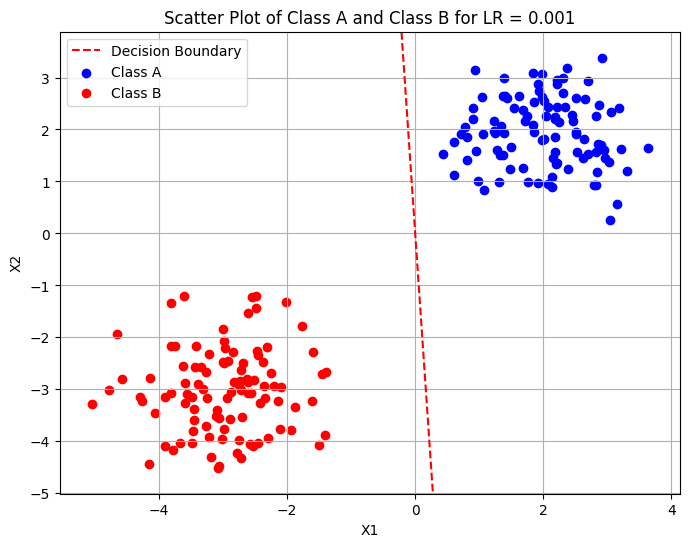

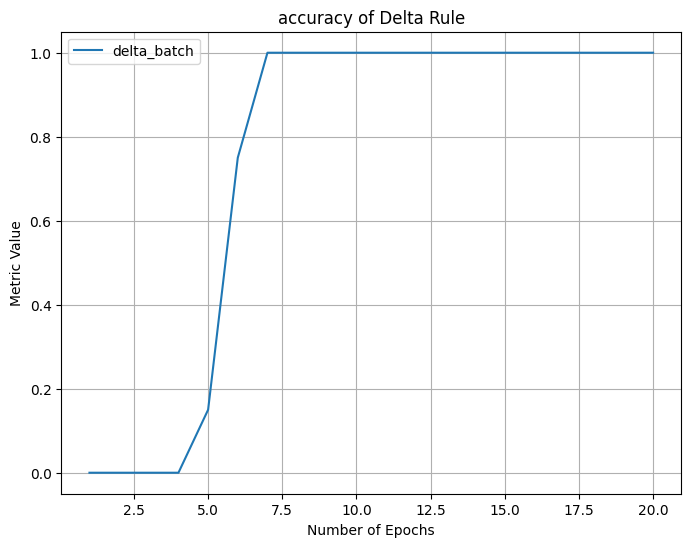

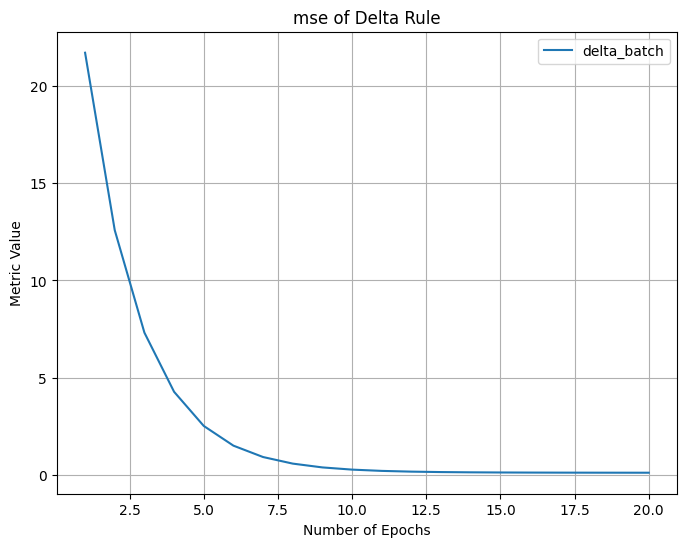

In [16]:
delta_batch_weights, delta_batch_accuracies, delta_batch_mses = delta_learning_batch(pattern1, target1, init_weights_nb,lr = 0.0001, epochs=20)
scatter_plot(classA1, classB1, delta_batch_weights)
metrics_plot([delta_batch_accuracies],['delta_batch'], 'accuracy')
metrics_plot([delta_batch_mses], ['delta_batch'], 'mse')


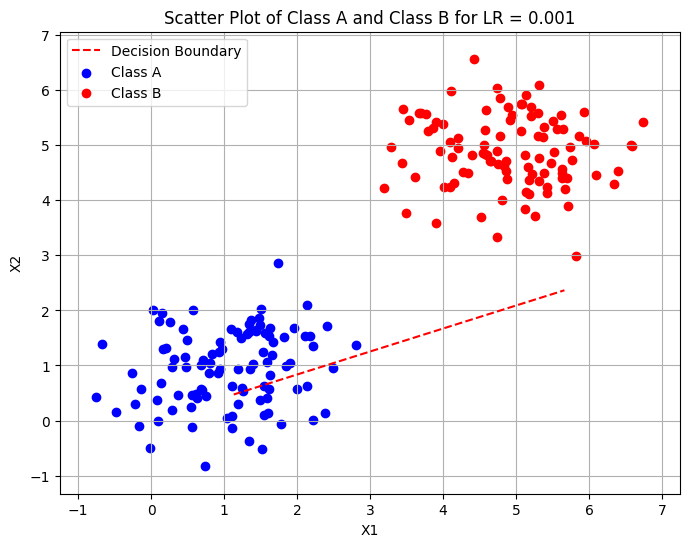

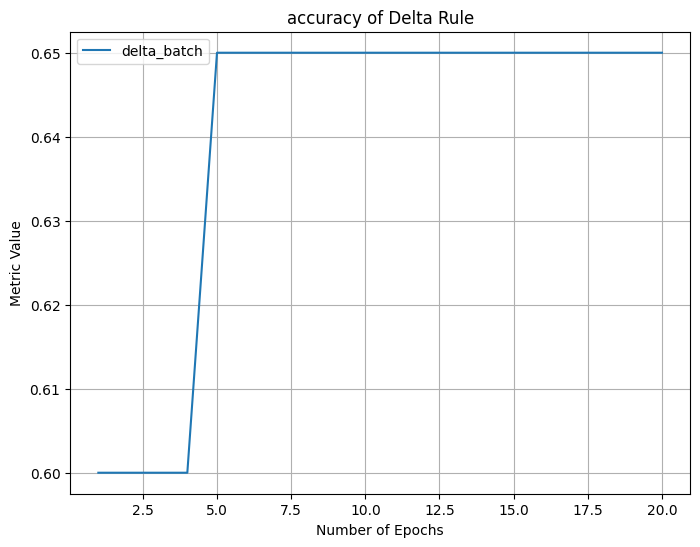

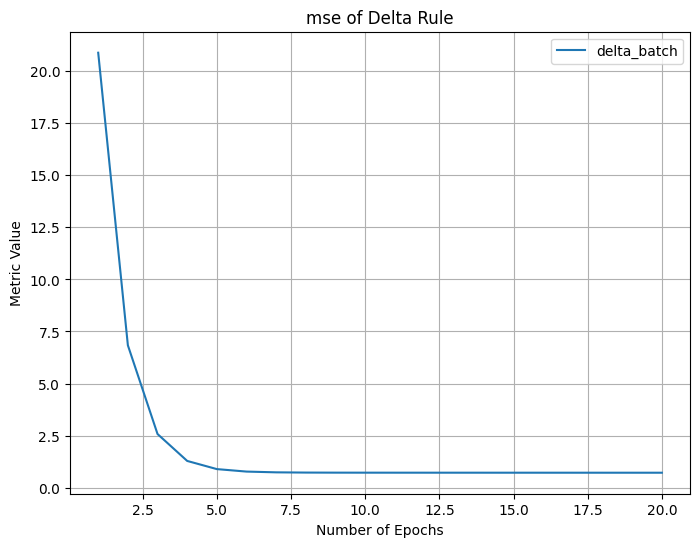

In [17]:
delta_batch_weights, delta_batch_accuracies, delta_batch_mses = delta_learning_batch(pattern2, target2, init_weights_nb,lr = 0.0001, epochs=20)
scatter_plot(classA2, classB2, delta_batch_weights)
metrics_plot([delta_batch_accuracies],['delta_batch'], 'accuracy')
metrics_plot([delta_batch_mses], ['delta_batch'], 'mse')

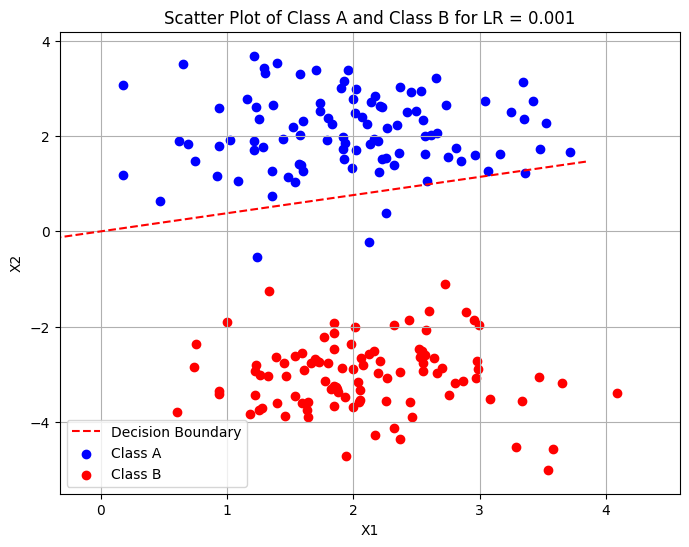

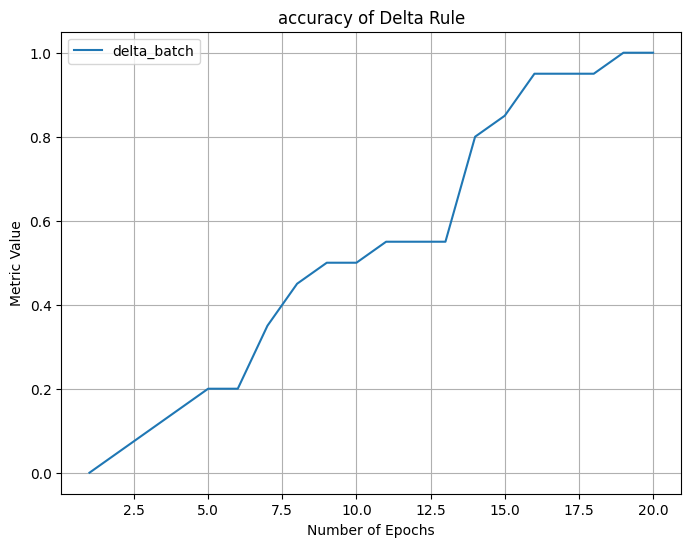

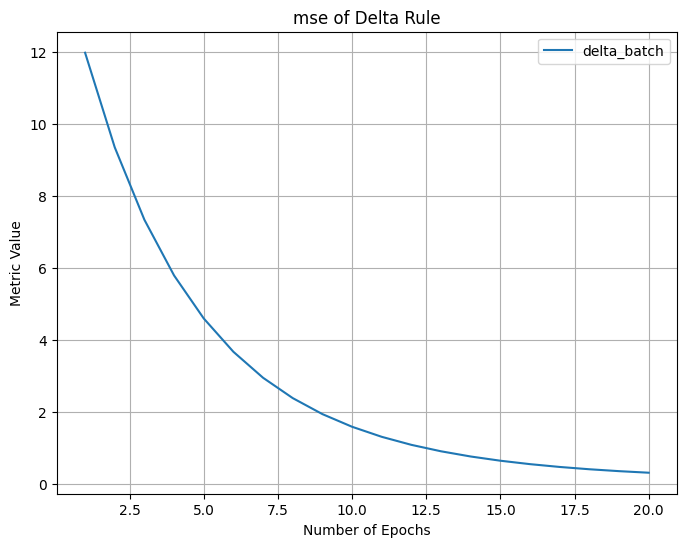

In [18]:
delta_batch_weights, delta_batch_accuracies, delta_batch_mses = delta_learning_batch(pattern3, target3, init_weights_nb,lr = 0.0001, epochs=20)
scatter_plot(classA3, classB3, delta_batch_weights)
metrics_plot([delta_batch_accuracies],['delta_batch'], 'accuracy')
metrics_plot([delta_batch_mses], ['delta_batch'], 'mse')

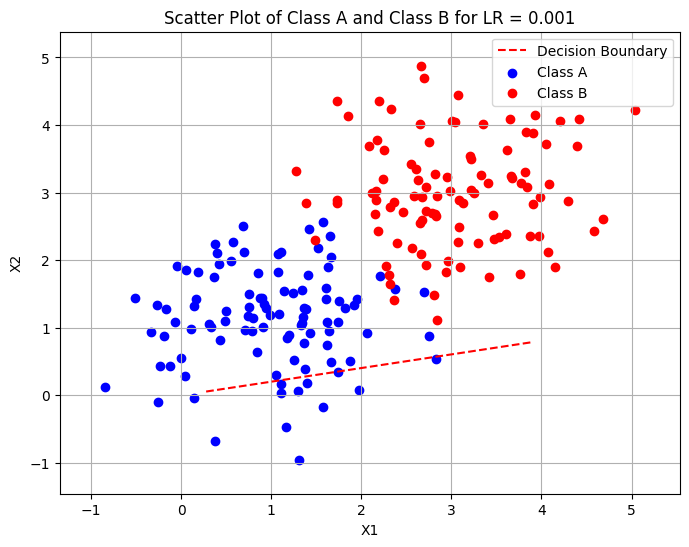

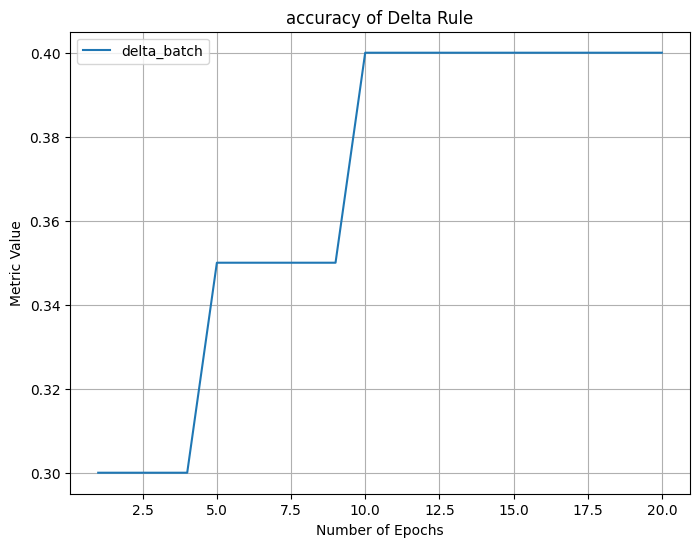

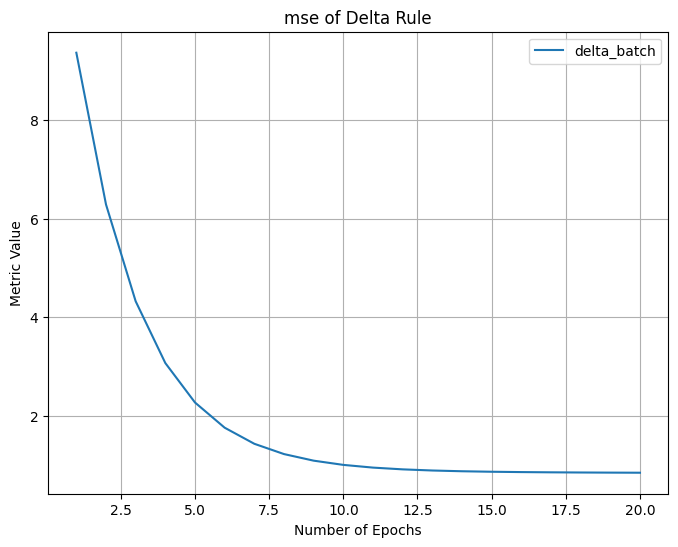

In [19]:
delta_batch_weights, delta_batch_accuracies, delta_batch_mses = delta_learning_batch(pattern4, target4, init_weights_nb,lr = 0.0001, epochs=20)
scatter_plot(classA4, classB4, delta_batch_weights)
metrics_plot([delta_batch_accuracies],['delta_batch'], 'accuracy')
metrics_plot([delta_batch_mses], ['delta_batch'], 'mse')

3.1.3: Classification of samples that are not linearly separable

(74, 2)
(74, 2)


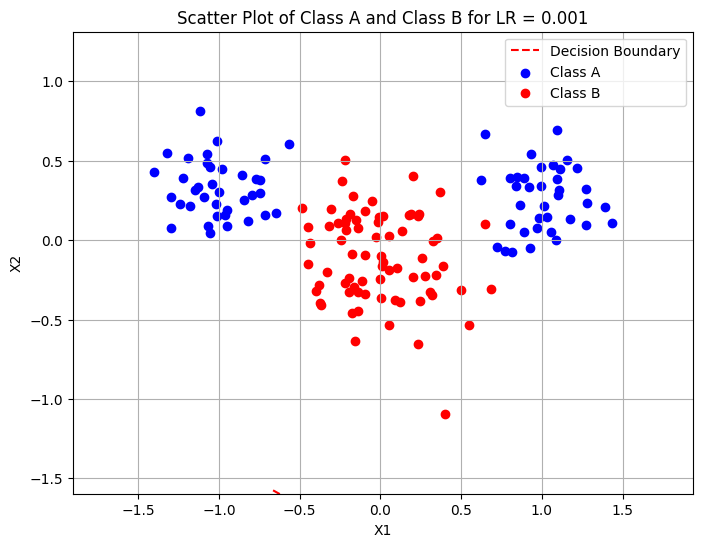

In [70]:
ndataA = 74
ndataB = 74
mA = [1.0, 0.3]
sigmaA = 0.2
mB = [0.0, -0.1]
sigmaB = 0.3


# Generate data for class A
classA75 = np.zeros((ndataA, 2))
classA75[:round(0.5 * ndataA), 0] = np.random.randn(int(0.5 * (ndataA))) * sigmaA + mA[0]
classA75[:round(0.5 * ndataA), 1] = np.random.randn(int(0.5 * round(ndataA))) * sigmaA + mA[1]
print(classA75.shape)

classA75[round(0.5 * ndataB):, 0] = np.random.randn(round(0.5 * ndataB)) * sigmaA - mA[0]
classA75[round(0.5 * ndataB):, 1] = np.random.randn(round(0.5 * ndataB)) * sigmaA + mA[1]

classB75 = np.zeros((ndataB, 2))
classB75[:, 0] = np.random.randn(ndataB) * sigmaB + mB[0]
classB75[:, 1] = np.random.randn(ndataB) * sigmaB + mB[1]
print(classB75.shape)


scatter_plot(classA75, classB75, init_weights)

--------------------------------------------------------------------------------

In [71]:
# function for pre-processing data

def preprocess_data_2(classA, classB, bias=True):

  len_classA = classA.shape[0]
  len_classB = classB.shape[0]

  # create target values
  targetA = -1 * np.ones((len_classA,1))  # label as -1
  targetB = np.ones((len_classB,1))       # label as 1

  if bias == True:
    # add bias to the data
    biasA = np.ones((len_classA,1))
    biasB = np.ones((len_classB,1))
    patternA = np.hstack((classA, biasA, targetA))
    patternB = np.hstack((classB, biasB, targetB))

  else:
    patternA = np.hstack((classA, targetA))
    patternB = np.hstack((classB, targetB))

  # shuffle the two classes and their respective targets
  pattern = np.vstack((patternA, patternB))
  shuffled_indices = np.random.permutation(pattern.shape[0])
  pattern = pattern[shuffled_indices, :]
  target = pattern[:,-1]
  pattern = np.delete(pattern, -1, axis=1)

  return pattern, target


# pre-process data
pattern75, target75 = preprocess_data_2(classA75, classB75, True)

# create initial random weights
init_weights = np.random.rand(pattern.shape[1]).T

In [72]:
# define batch learning

def delta_learning_batch_2(inputs, target, initial_weights, lr=0.001, epochs=20):

    weights = initial_weights.copy()

    # split data into training and test data
    tr_to_te_ratio = 0.9
    split_index = int(inputs.shape[0] * tr_to_te_ratio)
    inputs_test = inputs[split_index:,:]
    target_test = target[split_index:]
    inputs_train = inputs[:split_index,:]
    target_train = target[:split_index]

    accuracy_values = np.zeros(epochs)
    mse_values = np.zeros(epochs)

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(inputs_train.shape[0])
        inputs_train = inputs_train[shuffled_indices, :]
        target_train = target_train[shuffled_indices]

        prediction = np.dot(weights, inputs_train.T)
        error = target_train - prediction
        weights += lr * np.dot(error, inputs_train)

        predictions = np.sign(np.dot(weights, inputs_test.T))
        accuracy = calculate_accuracy(predictions, target_test)
        accuracy_values[epoch] = accuracy
        mse_values[epoch] = np.mean(error ** 2)

    return weights, accuracy_values, mse_values

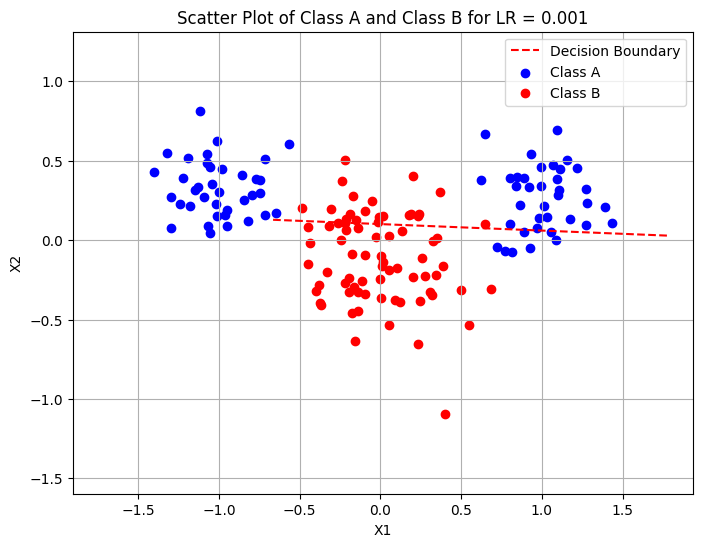

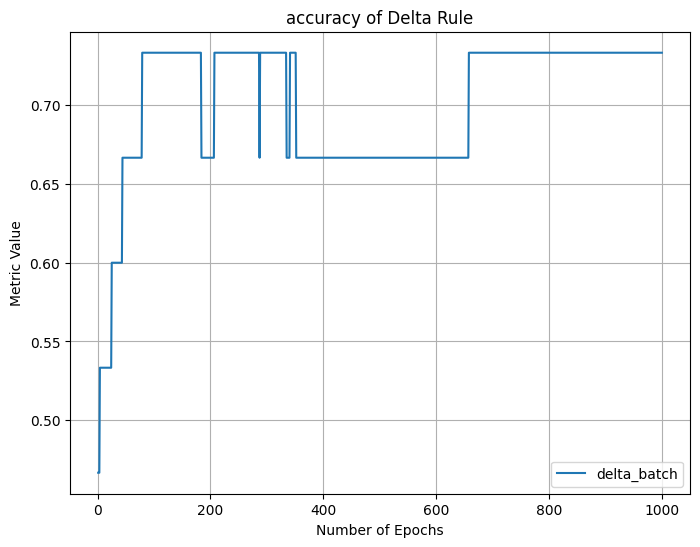

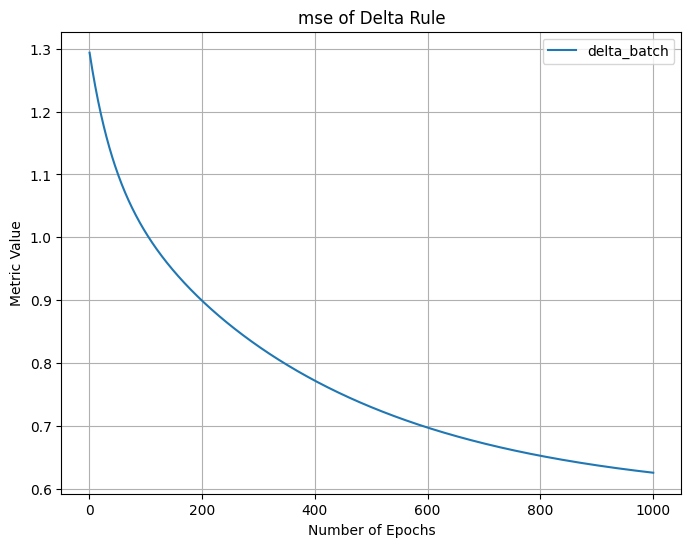

In [73]:
delta_batch_weights, delta_batch_accuracies, delta_batch_mses = delta_learning_batch_2(pattern75, target75, init_weights,lr = 0.0001, epochs=1000)
scatter_plot(classA75, classB75, delta_batch_weights)
metrics_plot([delta_batch_accuracies],['delta_batch'], 'accuracy')
metrics_plot([delta_batch_mses], ['delta_batch'], 'mse')

In [74]:
ndataA = 50
ndataB = 100
mA = [1.0, 0.3]
sigmaA = 0.2
mB = [0.0, -0.1]
sigmaB = 0.3


# Generate data for class A
classA50 = np.zeros((ndataA, 2))
classA50[:round(0.5 * ndataA), 0] = np.random.randn(int(0.5 * (ndataA))) * sigmaA + mA[0]
classA50[:round(0.5 * ndataA), 1] = np.random.randn(int(0.5 * round(ndataA))) * sigmaA + mA[1]
print(classA50.shape)

classA50[round(0.5 * ndataA):, 0] = np.random.randn(round(0.5 * ndataA)) * sigmaA - mA[0]
classA50[round(0.5 * ndataA):, 1] = np.random.randn(round(0.5 * ndataA)) * sigmaA + mA[1]

classB = np.zeros((ndataB, 2))
classB[:, 0] = np.random.randn(ndataB) * sigmaB + mB[0]
classB[:, 1] = np.random.randn(ndataB) * sigmaB + mB[1]
print(classB.shape)


pattern50, target50 = preprocess_data_2(classA50, classB, True)

(50, 2)
(100, 2)


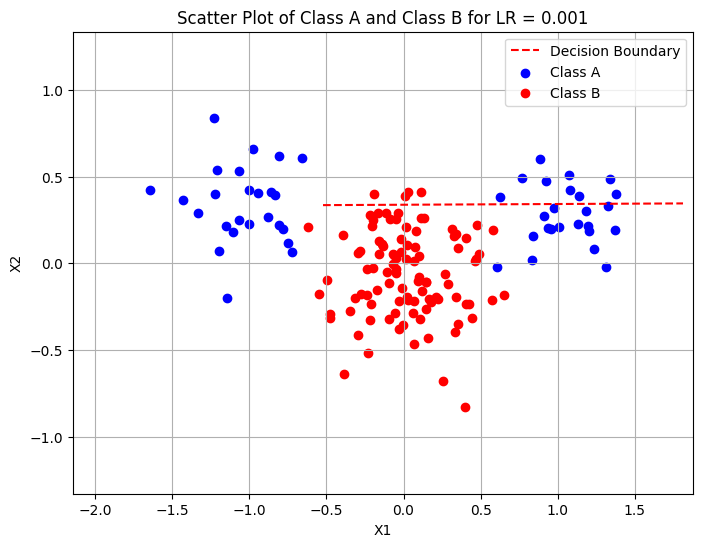

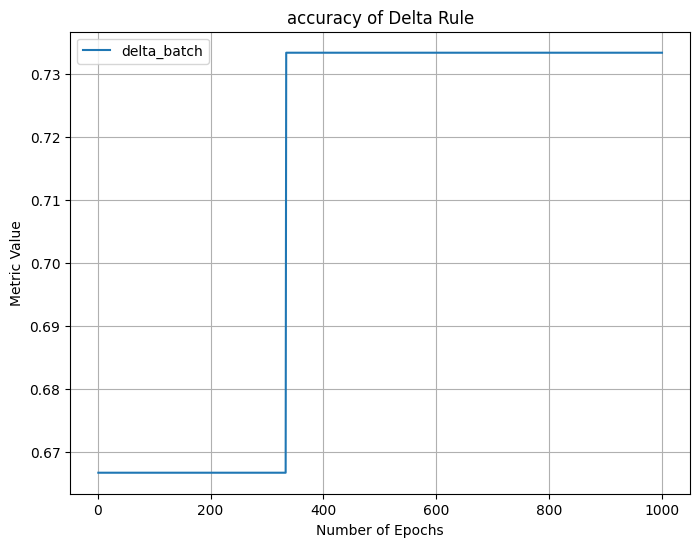

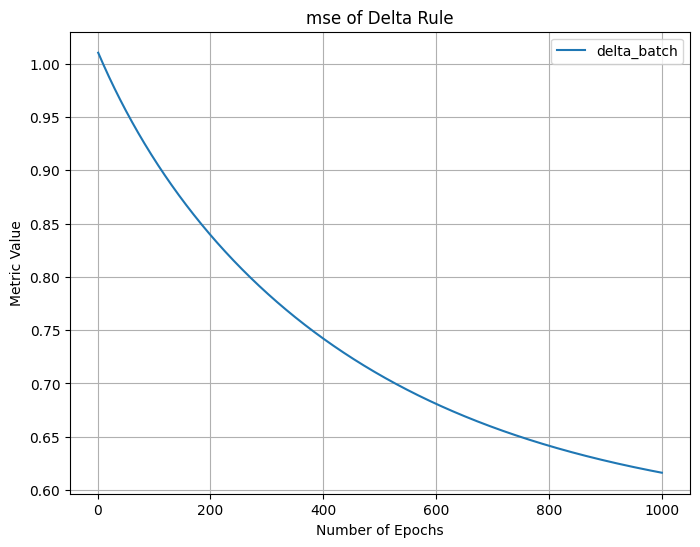

In [75]:
delta_batch_weights, delta_batch_accuracies, delta_batch_mses = delta_learning_batch_2(pattern50, target50, init_weights,lr = 0.0001, epochs=1000)
scatter_plot(classA50, classB, delta_batch_weights)
metrics_plot([delta_batch_accuracies],['delta_batch'], 'accuracy')
metrics_plot([delta_batch_mses], ['delta_batch'], 'mse')

In [64]:
ndataA = 100
ndataB = 50
mA = [1.0, 0.3]
sigmaA = 0.2
mB = [0.0, -0.1]
sigmaB = 0.3


# Generate data for class A
classA = np.zeros((ndataA, 2))
classA[:round(0.5 * ndataA), 0] = np.random.randn(int(0.5 * (ndataA))) * sigmaA + mA[0]
classA[:round(0.5 * ndataA), 1] = np.random.randn(int(0.5 * round(ndataA))) * sigmaA + mA[1]
print(classA.shape)

classA[round(0.5 * ndataA):, 0] = np.random.randn(round(0.5 * ndataA)) * sigmaA - mA[0]
classA[round(0.5 * ndataA):, 1] = np.random.randn(round(0.5 * ndataA)) * sigmaA + mA[1]

classB50 = np.zeros((ndataB, 2))
classB50[:, 0] = np.random.randn(ndataB) * sigmaB + mB[0]
classB50[:, 1] = np.random.randn(ndataB) * sigmaB + mB[1]
print(classB50.shape)


pattern75, target75 = preprocess_data_2(classA, classB50, True)

(100, 2)
(50, 2)


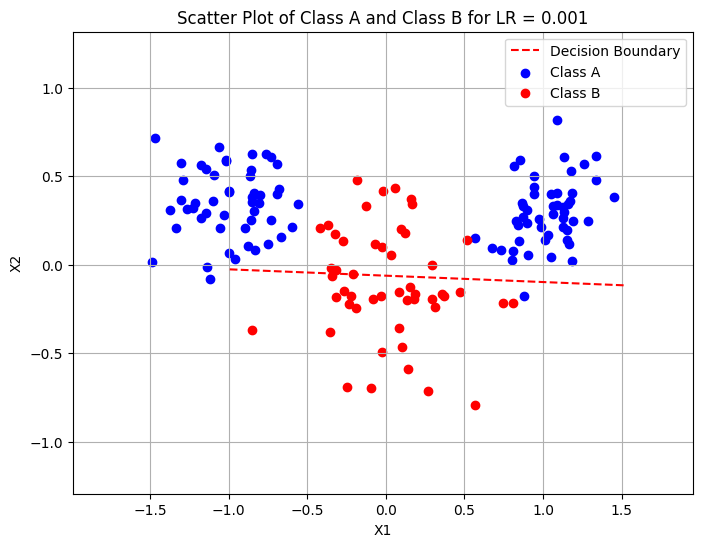

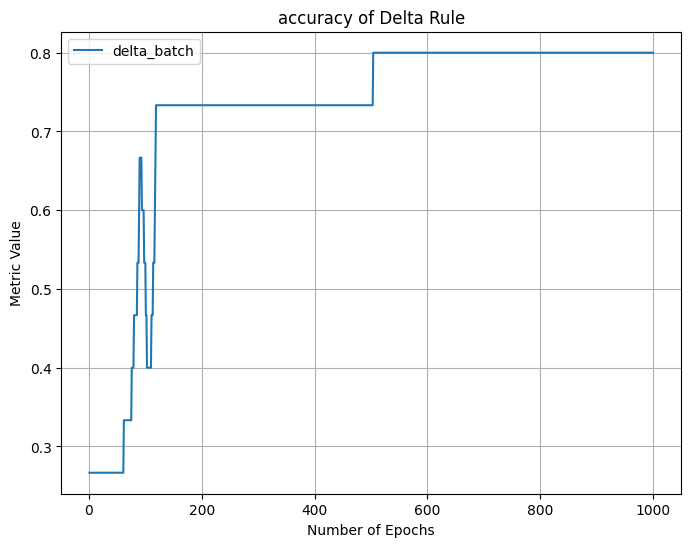

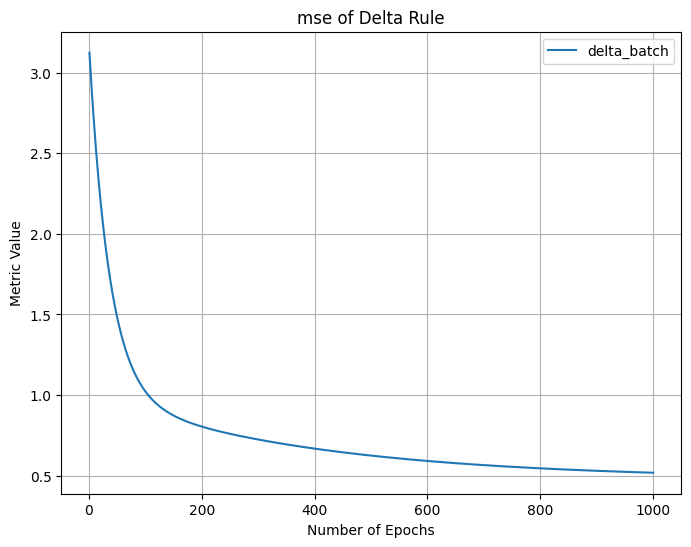

In [65]:
delta_batch_weights, delta_batch_accuracies, delta_batch_mses = delta_learning_batch_2(pattern75, target75, init_weights,lr = 0.0001, epochs=1000)
scatter_plot(classA, classB50, delta_batch_weights)
metrics_plot([delta_batch_accuracies],['delta_batch'], 'accuracy')
metrics_plot([delta_batch_mses], ['delta_batch'], 'mse')

In [67]:
ndataAa = 10 # Removed 80% of subset A > 0
ndataAb = 40 # Removed 20% of subset A < 0
ndataA = ndataAa + ndataAb
ndataB = 100
mA = [1.0, 0.3]
sigmaA = 0.2
mB = [0.0, -0.1]
sigmaB = 0.3


# Generate data for class A
classA = np.zeros((ndataA, 2))
classA[:round(ndataAa), 0] = np.random.randn(int((ndataAa))) * sigmaA + mA[0]
classA[:round(ndataAa), 1] = np.random.randn(int(round(ndataAa))) * sigmaA + mA[1]
print(classA.shape)

classA[round(ndataAa):, 0] = np.random.randn(round(ndataAb)) * sigmaA - mA[0]
classA[round(ndataAa):, 1] = np.random.randn(round(ndataAb)) * sigmaA + mA[1]

classB50 = np.zeros((ndataB, 2))
classB50[:, 0] = np.random.randn(ndataB) * sigmaB + mB[0]
classB50[:, 1] = np.random.randn(ndataB) * sigmaB + mB[1]
print(classB50.shape)


pattern75, target75 = preprocess_data_2(classA, classB50, True)

(50, 2)
(100, 2)


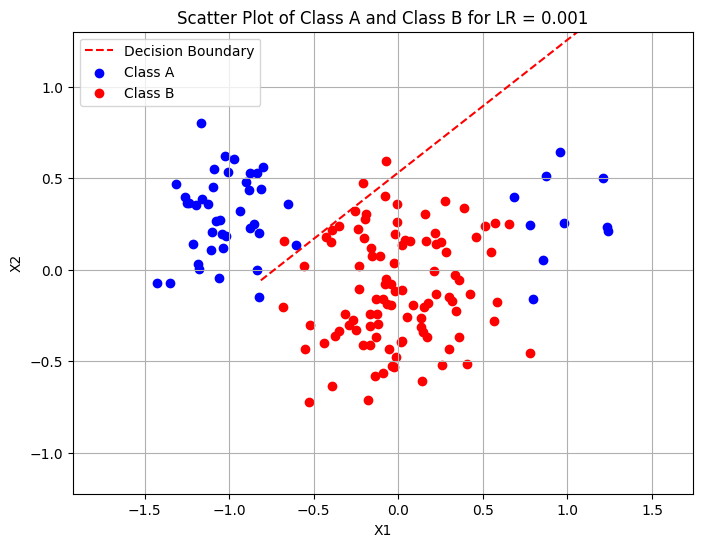

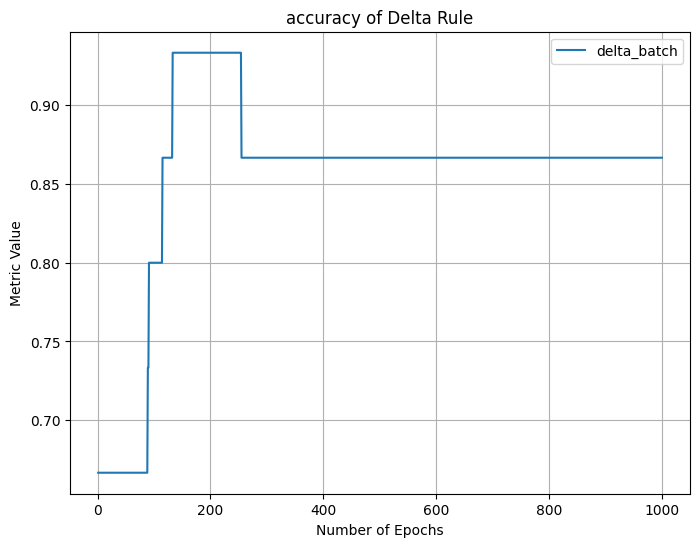

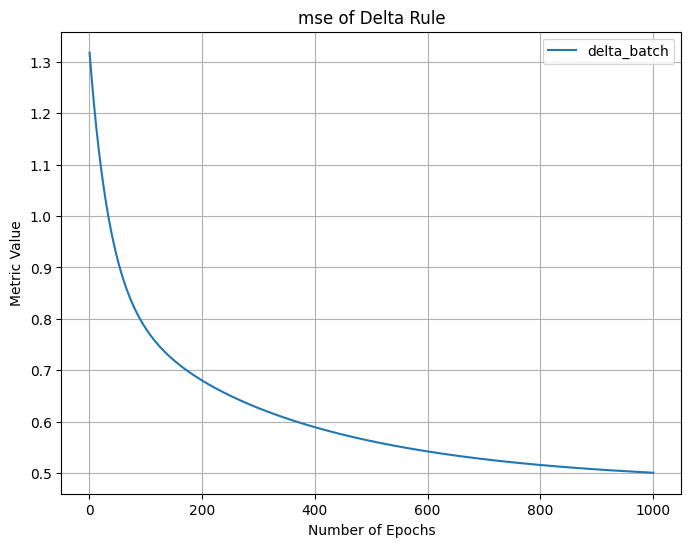

In [69]:
delta_batch_weights, delta_batch_accuracies, delta_batch_mses = delta_learning_batch_2(pattern75, target75, init_weights,lr = 0.0001, epochs=1000)
scatter_plot(classA, classB50, delta_batch_weights)
metrics_plot([delta_batch_accuracies],['delta_batch'], 'accuracy')
metrics_plot([delta_batch_mses], ['delta_batch'], 'mse')